In [1]:
import pandas as pd
import cv2
import glob
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.utils import np_utils
import pickle
from keras.optimizers import Adagrad

Using TensorFlow backend.


In [2]:
from LeNet import LeNet

In [3]:
fruits_name = [name for name in os.listdir(r'D:\Machine Learning 3\fruits-360\Training')]

In [4]:
# load train labels
# make an empty list to store training image and label
#trainLabels = []

# loop through images in training folder, read image and append to dataframe
#for name in fruits_name:
#    folder_path = r'D:\Machine Learning 3\fruits-360\Training\\' + name + '\\'
#    glob_path = glob.glob(folder_path + '*.jpg')
#    for im_path in glob_path:
#        trainLabels.append(name)

#trainLabels = np.array(trainLabels)

In [5]:
# make an empty list to store training image and label
trainData = []
trainLabels = []

# loop through images in training folder, read image and append to dataframe
for name in fruits_name:
    folder_path = r'D:\Machine Learning 3\fruits-360\Training\\' + name + '\\'
    glob_path = glob.glob(folder_path + '*.jpg')
    for im_path in glob_path:
        im_tempo = cv2.imread(im_path)
        trainData.append(im_tempo)
        trainLabels.append(name)
trainData = np.array(trainData)
trainLabels = np.array(trainLabels)

In [6]:
# load test data
fruits_name = [name for name in os.listdir(r'D:\Machine Learning 3\fruits-360\Training')]
testData = []
testLabels = []

# loop through images in test folder, read image and append to dataframe
for name in fruits_name:
    folder_path = r'D:\Machine Learning 3\fruits-360\Test\\' + name + '\\'
    glob_path = glob.glob(folder_path + '*.jpg')
    for im_path in glob_path:
        im_tempo = cv2.imread(im_path)
        testData.append(im_tempo)
        testLabels.append(name)
testData = np.array(testData)
testLabels = np.array(testLabels)

In [7]:
testData.shape

(13877, 100, 100, 3)

In [8]:
testLabels.shape

(13877,)

In [9]:
# scale data to [0,1]
testData = testData.astype('float32')/255.0
trainData = trainData.astype('float32')/255.0

In [10]:
# factorize labels and keep a save record for later reference
tempo = np.concatenate((trainLabels, testLabels))                          # concatenate labels into one
factorize = pd.factorize(tempo)                                            # factorzie labels
tempo_category = np_utils.to_categorical(factorize[0], len(fruits_name))   # categorize labels
trainLabels = tempo_category[:len(trainLabels)]                            # put categorized labels to data
testLabels = tempo_category[len(trainLabels):]                             # put categorized labels to data_test
fruit_table = pd.Series(factorize[1])                                      # create table for later references
del tempo
del tempo_category
del trainLabels

1. OPTIMIZER & EPOCH

Các optimizer thường được sử dụng:
- SGD (benchmark)

- SGD + Nesterov (NAG) (remedy for high momentum)

- Adagrad: different learning rate for each parameter
  + The main benefit of Adagrad is that we don’t need to manually tune the learning Rate. Most implementations use a default value of 0.01 and leave it at that.)
  + Disadvantage: decaying learning rate (remedy by AdaDelta)
  
- AdaDelta: remedy for decaying learning rate of Adagrad

- Adam: defferent momentum for each parameter
  + Adam works well in practice and compares favorably to other adaptive learning-method algorithms as it converges very fast and the learning speed of the Model is quiet Fast and efficient and also it rectifies every problem that is faced in other optimization techniques such as vanishing Learning rate , slow convergence or High variance in the parameter updates which leads to fluctuating Loss function

In [11]:
# load Benchmark's training history
with open(r'D:\Machine Learning 3\Assignment fruit\Benchmark\Benchmark-history','rb') as file:
    benchmark_history = pickle.load(file)

In [12]:
# load NAG's training history
with open(r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\SGD-Nesterov-history','rb') as file:
    NAG_history = pickle.load(file)

In [13]:
# load Adagrad's training history
with open(r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\Adagrad-history','rb') as file:
    Adagrad_history = pickle.load(file)

In [14]:
# load AdaDelta's training history
with open(r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\Adadelta-history','rb') as file:
    Adadelta_history = pickle.load(file)

In [15]:
# load Adam's training history
with open(r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\Adam-history','rb') as file:
    Adam_history = pickle.load(file)

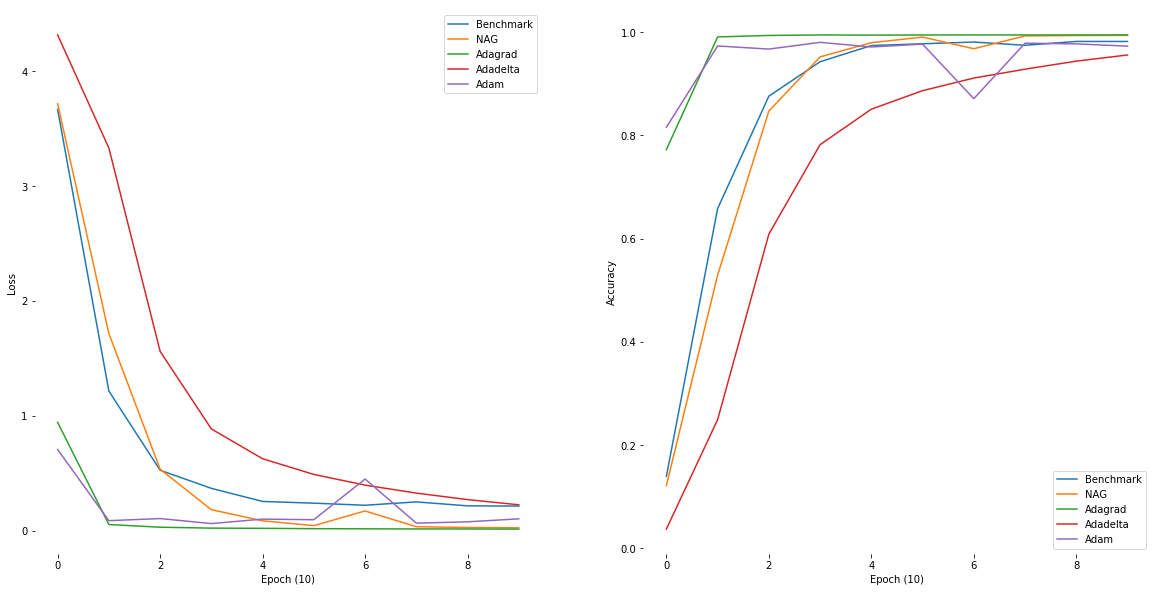

In [16]:
f, (ax, ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax.plot(np.arange(10), benchmark_history.__dict__['history']['loss'][:10], label='Benchmark')
ax.plot(np.arange(10), NAG_history.__dict__['history']['loss'][:10], label='NAG')
ax.plot(np.arange(10), Adagrad_history.__dict__['history']['loss'][:10], label='Adagrad')
ax.plot(np.arange(10), Adadelta_history.__dict__['history']['loss'][:10], label='Adadelta')
ax.plot(np.arange(10), Adam_history.__dict__['history']['loss'][:10], label='Adam')
sb.despine(ax=ax, left=True, bottom=True)
ax.legend(frameon=True, loc='upper right', ncol=1)
ax.set_xlabel('Epoch (10)')
ax.set_ylabel('Loss')

ax2.plot(np.arange(10), benchmark_history.__dict__['history']['acc'][:10], label='Benchmark')
ax2.plot(np.arange(10), NAG_history.__dict__['history']['acc'][:10], label='NAG')
ax2.plot(np.arange(10), Adagrad_history.__dict__['history']['acc'][:10], label='Adagrad')
ax2.plot(np.arange(10), Adadelta_history.__dict__['history']['acc'][:10], label='Adadelta')
ax2.plot(np.arange(10), Adam_history.__dict__['history']['acc'][:10], label='Adam')
sb.despine(ax=ax2, left=True, bottom=True)
ax2.legend(frameon=True, loc='lower right', ncol=1)
ax2.set_xlabel('Epoch (10)')
ax2.set_ylabel('Accuracy')

plt.show()

- AdaDelta có tốc độ hội tụ chậm nhất, NAG ban đầu hội tụ chậm hơn benchmark nhưng sau đó hội tụ nhanh dần
- Adam và Adagrad có tốc độ hội tụ nhanh hơn benchmark và cần ít epoch để hội tụ
- Mô hình có accuracy trên train data cao nhất là Adam và Adagrad
- Benchmark và NAG có accuracy tương tự nhau
- Mô hình có accuracy thấp nhất là AdaDelta

=> chọn optimizer Adam hoặc Adagrad để có tốc độ hội tụ nhanh cũng như accuracy tốt. Xét thêm về performance trên test data.

In [17]:
# load benchmark model
benchmark = LeNet.build(numChannels=3, imgRows=100, imgCols=100, numClasses=len(fruits_name),
                    weightsPath = r'D:\Machine Learning 3\Assignment fruit\Benchmark\Benchmark.hdf5')

In [18]:
# predict on test dataset and then delete model to save memory
benchmark_pred = benchmark.predict(testData, batch_size = 128, verbose = 1)
del benchmark

13877/13877 [==============================] - 66s 5ms/step


In [19]:
# load NAG model
NAG = LeNet.build(numChannels=3, imgRows=100, imgCols=100, numClasses=len(fruits_name),
                    weightsPath = r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\SGD-Nesterov.hdf5')

In [20]:
# predict on test dataset and then delete model to save memory
NAG_pred = NAG.predict(testData, batch_size = 128, verbose = 1)
del NAG

13877/13877 [==============================] - 62s 4ms/step


In [21]:
# load Adagrad model
Adagrad = LeNet.build(numChannels=3, imgRows=100, imgCols=100, numClasses=len(fruits_name),
                    weightsPath = r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\Adagrad.hdf5')

In [22]:
# predict on test dataset and then delete model to save memory
Adagrad_pred = Adagrad.predict(testData, batch_size = 128, verbose = 1)
del Adagrad

13877/13877 [==============================] - 58s 4ms/step


In [23]:
# load Adadelta model
Adadelta = LeNet.build(numChannels=3, imgRows=100, imgCols=100, numClasses=len(fruits_name),
                    weightsPath = r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\Adadelta.hdf5')

In [24]:
# predict on test dataset and then delete model to save memory
Adadelta_pred = Adadelta.predict(testData, batch_size = 128, verbose = 1)
del Adadelta

13877/13877 [==============================] - 61s 4ms/step


In [25]:
# load Adam model
Adam = LeNet.build(numChannels=3, imgRows=100, imgCols=100, numClasses=len(fruits_name),
                    weightsPath = r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Optimizer\Adam.hdf5')

In [26]:
# predict on test dataset and then delete model to save memory
Adam_pred = Adam.predict(testData, batch_size = 128, verbose = 1)
del Adam

13877/13877 [==============================] - 59s 4ms/step


In [27]:
# turn the predict vector to final predict base on argmax
benchmark_pred = [np.argmax(i) for i in benchmark_pred]
NAG_pred = [np.argmax(i) for i in NAG_pred]
Adagrad_pred = [np.argmax(i) for i in Adagrad_pred]
Adadelta_pred = [np.argmax(i) for i in Adadelta_pred]
Adam_pred = [np.argmax(i) for i in Adam_pred]

In [28]:
# turn the test labels vector to final label base on argmax
testLabels = [np.argmax(i) for i in testLabels]

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
precision = []
recall = []
f1 = []

for predict in [benchmark_pred, NAG_pred, Adagrad_pred, Adadelta_pred, Adam_pred]:
    precision.append(precision_score(testLabels, predict, average='weighted'))
    recall.append(recall_score(testLabels, predict, average='weighted'))
    f1.append(f1_score(testLabels, predict, average='weighted'))

C:\Users\PC\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\PC\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [31]:
# dataframe của các performance
pd.DataFrame({'Precision':precision,'Recall':recall,'F1 score':f1},index=['Benchmark', 'NAG', 'Adagrad', 'Adadelta', 'Adam']).sort_values('F1 score', ascending=False)

,Precision,Recall,F1 score
Adagrad,0.946853,0.941414,0.940832
NAG,0.929059,0.924696,0.923661
Benchmark,0.910501,0.912661,0.907141
Adadelta,0.892854,0.881603,0.881119
Adam,0.839117,0.822944,0.821617


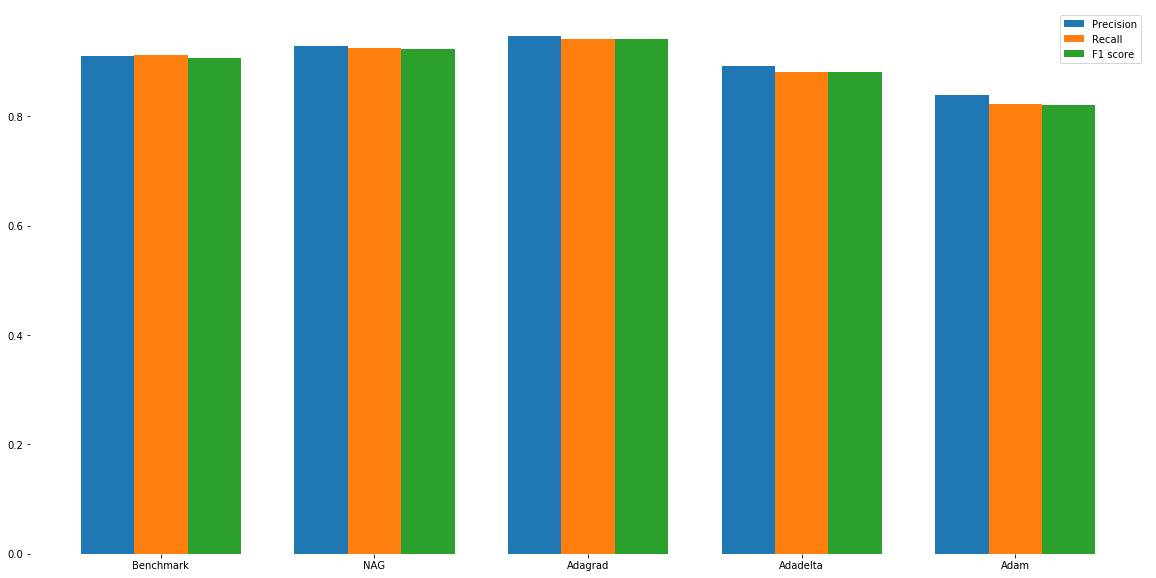

In [32]:
f, ax = plt.subplots(figsize=(20,10))
x_lab = ['Benchmark', 'NAG', 'Adagrad', 'Adadelta', 'Adam']
w = 0.25
ax.bar(np.arange(5)-w, precision, width=w, label='Precision')
ax.bar(np.arange(5), recall, tick_label = x_lab, width=w, label='Recall')
ax.bar(np.arange(5)+w, f1, width=w, label='F1 score')
sb.despine(bottom=True, left=True)
ax.legend(frameon=True, loc='upper right', ncol=1)
plt.show()

- Kết quả trên test data phù hợp với kết quả trên train data cho thấy không có overfitting.
- Optimizer Adagrad cho performance tốt nhất cả trên train data và test data

=> Chọn optimizer Adagrad để tiếp tục tuning đồng thời chọn số epoch là 5

2. LEARNING RATE

In [2]:
# load learning rate's training history
with open(r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Learning rate\lr-history','rb') as file:
    lr_history = pickle.load(file)

In [3]:
lr_history[0].__dict__['history']['loss']

[15.98975407667009,
 16.02526451547681,
 16.025264506614437,
 16.025264533201554,
 16.025264536155678]

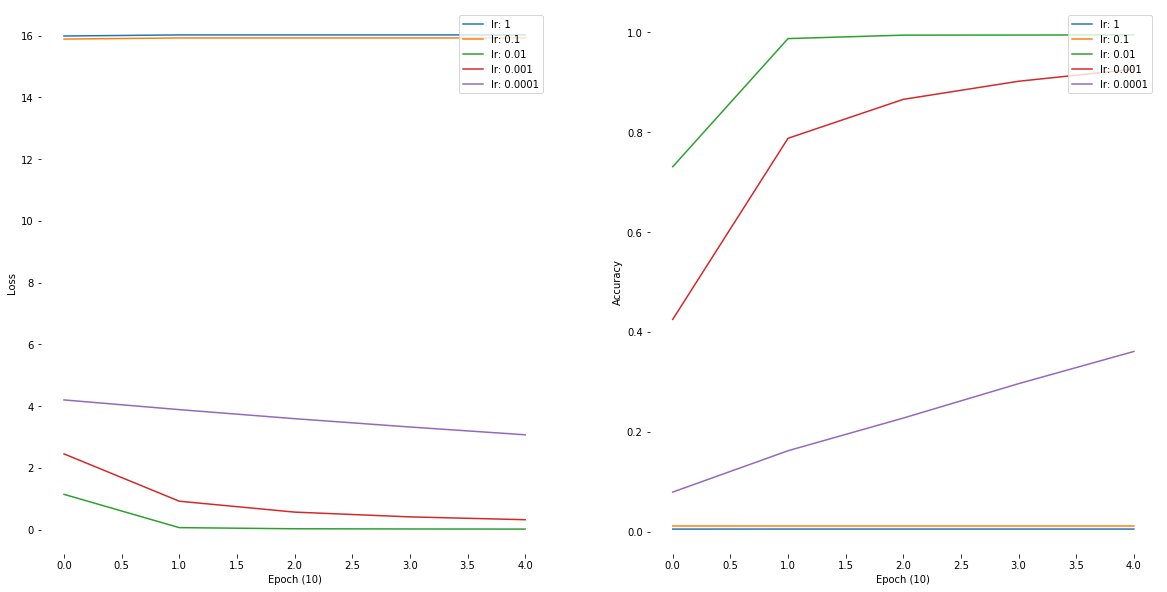

In [5]:
f, (ax, ax2) = plt.subplots(ncols=2, figsize=(20,10))

ax.plot(np.arange(5), lr_history[0].__dict__['history']['loss'], label='lr: 1')
ax.plot(np.arange(5), lr_history[1].__dict__['history']['loss'], label='lr: 0.1')
ax.plot(np.arange(5), lr_history[2].__dict__['history']['loss'], label='lr: 0.01')
ax.plot(np.arange(5), lr_history[3].__dict__['history']['loss'], label='lr: 0.001')
ax.plot(np.arange(5), lr_history[4].__dict__['history']['loss'], label='lr: 0.0001')
sb.despine(ax=ax, left=True, bottom=True)
ax.legend(frameon=True, loc='upper right', ncol=1)
ax.set_xlabel('Epoch (10)')
ax.set_ylabel('Loss')

ax2.plot(np.arange(5), lr_history[0].__dict__['history']['acc'], label='lr: 1')
ax2.plot(np.arange(5), lr_history[1].__dict__['history']['acc'], label='lr: 0.1')
ax2.plot(np.arange(5), lr_history[2].__dict__['history']['acc'], label='lr: 0.01')
ax2.plot(np.arange(5), lr_history[3].__dict__['history']['acc'], label='lr: 0.001')
ax2.plot(np.arange(5), lr_history[4].__dict__['history']['acc'], label='lr: 0.0001')
sb.despine(ax=ax2, left=True, bottom=True)
ax2.legend(frameon=True, loc='upper right', ncol=1)
ax2.set_xlabel('Epoch (10)')
ax2.set_ylabel('Accuracy')

plt.show()

Learning rate 0.01 cho khả năng hội tụ nhanh nhất và accuracy cao nhất

=> chọn learning rate 0.01 để train